<a href="https://colab.research.google.com/github/sigma-asif/data-communication-lab/blob/main/8qam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

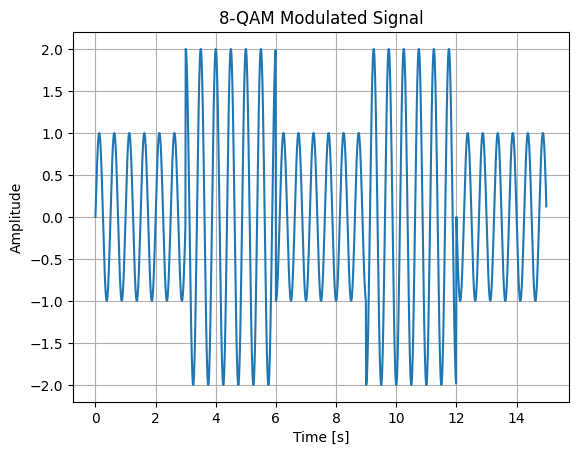

In [1]:
import numpy as np

import matplotlib.pyplot as plt;


qam_map = {

    (0, 0, 0): (1, 0),           # Amplitude 1, Phase 0 degrees

    (0, 1, 0): (1, np.pi / 2),   # Amplitude 1, Phase 90 degrees

    (1, 0, 0): (1, np.pi),   # Amplitude 1, Phase 180 degrees

    (1, 1, 0): (1, 3 * np.pi / 2), # Amplitude 1, Phase 270 degrees

    (0, 0, 1): (2, 0),           # Amplitude 2, Phase 0 degrees

    (0, 1, 1): (2, np.pi / 2),   # Amplitude 2, Phase 90 degrees

    (1, 0, 1): (2, np.pi ),   # Amplitude 2, Phase 180 degrees

    (1, 1, 1): (2, 3 * np.pi / 2) # Amplitude 2, Phase 270 degrees

}


def qam(binary_data,frequency, sampling_rate):

    t = np.linspace(0,len(binary_data),len(binary_data)*sampling_rate,endpoint = False)

    signal = []


    for i in range(0,len(binary_data),3):

        bit_triplet =(binary_data[i],binary_data[i+1],binary_data[i+2])

        amp,phase = qam_map[bit_triplet]

        start_index = len(signal)

        end_index = start_index+ 3*sampling_rate

        signal.extend(amp * np.sin(2 * np.pi * frequency * t[start_index:end_index] + phase))


    return t,signal

def main():

    binary_data = [0,0,0,0,1,1,1,1,0,1,1,1,1,0,0]

    frequency = 2;

    sampling_rate = 100


    t,signal = qam(binary_data,frequency,sampling_rate)

    plt.plot(t, signal)
    plt.title("8-QAM Modulated Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

main()